# TO DO

verifica ultimo esercizio

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import sklearn

# Direct Methods for the solution of Linear Systems


## Creating Matrixes

In [3]:
# Create an array of random matrices

l_random_N = np.arange(10,101,10)

# array of random matrices
l_random_matrix = np.array([np.random.rand(dim,dim) for dim in l_random_N], dtype=object)

print(l_random_matrix[3].shape)
print(l_random_matrix.shape)


(40, 40)
(10,)


In [4]:
# Create an array of Vandermonde matrices

l_vand_N = np.arange(5,31,5)

# array of Vandermonde matrices
l_vand_matrix = np.array([np.vander(np.arange(1,dim+1,1),dim, increasing=False) for dim in l_vand_N], dtype=object)

print(l_vand_matrix[3].shape)
print(l_vand_matrix.shape)

(20, 20)
(6,)


In [5]:
# Create an array of Hilbert matrices

l_hilb_N = np.arange(4,13,1)

# array of Hilbert matrices
l_hilb_matrix = np.array([scipy.linalg.hilbert(dim) for dim in l_hilb_N], dtype=object)

print(l_hilb_matrix[3].shape)
print(l_hilb_matrix.shape)

(7, 7)
(9,)


In [6]:
matrix_dict = {
    'random': l_random_matrix,
    'hilbert': l_hilb_matrix,
    'vander': l_vand_matrix
}

N_dict = {
    'random': l_random_N,
    'hilbert': l_hilb_N,
    'vander': l_vand_N
}

## Creating Test Problem

In [7]:
conditions_2 = {}
conditions_inf = {}
conditions = [conditions_2, conditions_inf]
rel_errors = {}
for key in matrix_dict:
    print("--------------------")
    print(key)
    print("--------------------")
    print(" ")
    rel_errors[key] = []
    conditions_2[key] = []
    conditions_inf[key] = []
    for i in range(len(matrix_dict[key])):
        # Extract the singular matrix
        A = matrix_dict[key][i]
        n = A.shape[0]
        print("matrix shape = ", A.shape)
        
        # Solution by construction
        x_true = np.ones((n, ))
        y = A @ x_true

        # Solving the system with numpy
        x_sol = np.linalg.solve(A, y)

        # Computing the relative error
        E_rel = np.linalg.norm(x_true - x_sol, 2) / np.linalg.norm(x_true, 2)
        rel_errors[key].append(E_rel)
        print("The relative error is ", E_rel)

        # Calculate the condition number in second norm
        cond_2_norm = np.linalg.cond(A, p = 2)
        conditions_2[key].append(cond_2_norm)
        print("Condition number (2-norm):", cond_2_norm)

        # Calculate the condition number in infinity norm
        cond_inf_norm = np.linalg.cond(A, p = np.inf)
        conditions_inf[key].append(cond_inf_norm)
        print("Condition number (inf-norm):", cond_inf_norm)
        print(" ")


--------------------
random
--------------------
 
matrix shape =  (10, 10)
The relative error is  1.1129951213863742e-15
Condition number (2-norm): 250.49733073966644
Condition number (inf-norm): 497.6707435733087
 
matrix shape =  (20, 20)
The relative error is  4.643268064439051e-15
Condition number (2-norm): 650.0258887757651
Condition number (inf-norm): 1485.9923366931846
 
matrix shape =  (30, 30)
The relative error is  3.1284074180907394e-14
Condition number (2-norm): 987.9529850097756
Condition number (inf-norm): 2195.889779681947
 
matrix shape =  (40, 40)
The relative error is  1.8460927698198023e-13
Condition number (2-norm): 3997.462658087859
Condition number (inf-norm): 9930.602783060922
 
matrix shape =  (50, 50)
The relative error is  6.929481355151295e-14
Condition number (2-norm): 2292.997779378693
Condition number (inf-norm): 5860.757319798969
 
matrix shape =  (60, 60)
The relative error is  1.4480482188826792e-14
Condition number (2-norm): 5032.694238481036
Conditio

## Visulizations Results

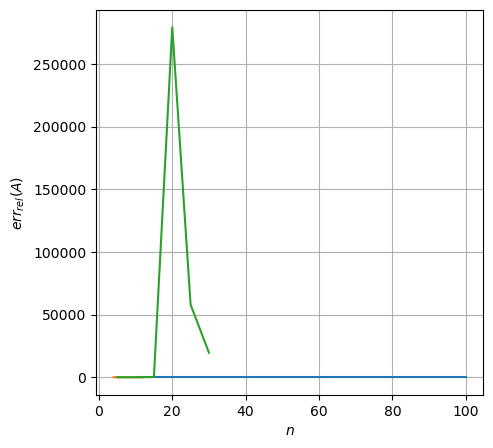

In [8]:
plt.figure(figsize=(5, 5))

for i in matrix_dict:
    plt.plot(N_dict[i], rel_errors[i])
plt.grid()
plt.xlabel(r"$n$")
plt.ylabel(r"$ err_{rel}(A)$")
plt.show()

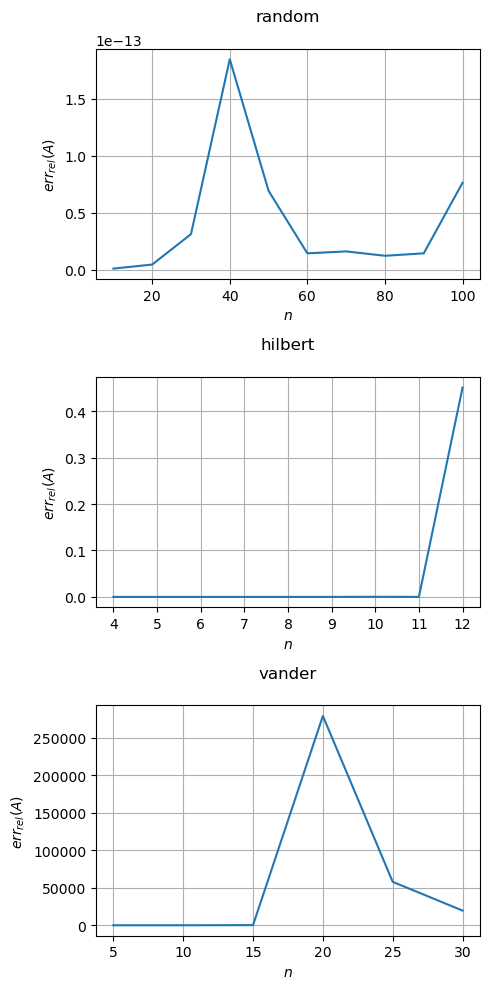

In [9]:
plt.figure(figsize=(5, 10))
j = 0
for i in matrix_dict:
    plt.subplot(3, 1, j+1)
    plt.title(i, pad=20)
    plt.plot(N_dict[i], rel_errors[i])
    plt.grid()
    plt.xlabel(r"$n$")
    plt.ylabel(r"$ err_{rel}(A)$")
    j += 1
plt.tight_layout()
plt.show()

more the dimension increases mnore teh err rel increses for random is constant and slow for hilbert is more fats and for vander is the worst

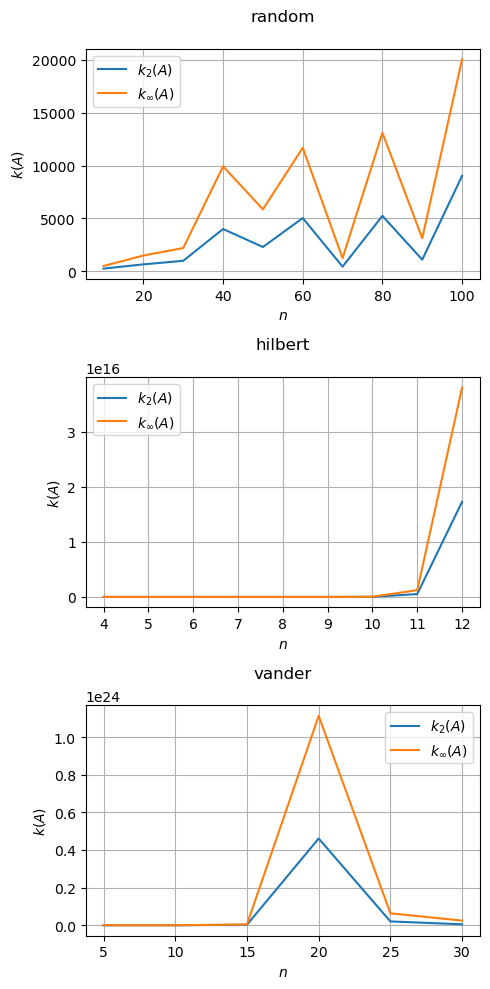

In [10]:
plt.figure(figsize=(5, 10))
j = 0
for i in matrix_dict:
    plt.subplot(3, 1, j+1)
    plt.title(i, pad=20)
    plt.plot(N_dict[i], conditions[0][i])
    plt.plot(N_dict[i], conditions[1][i])
    plt.grid()
    plt.xlabel(r"$n$")
    plt.ylabel(r"$ k(A)$")
    plt.legend([r"$ k_2(A)$",r"$ k_{\infty}(A)$"])
    j += 1
plt.tight_layout()
plt.show()

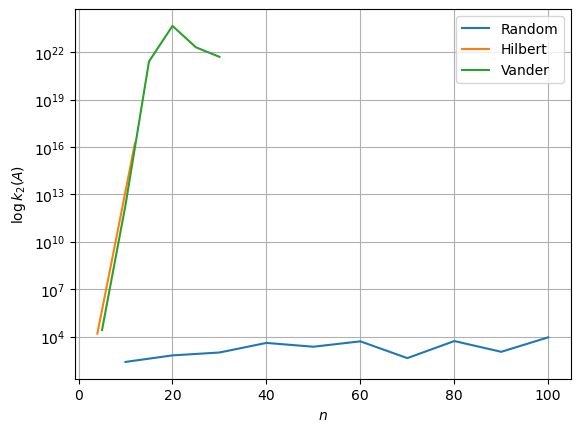

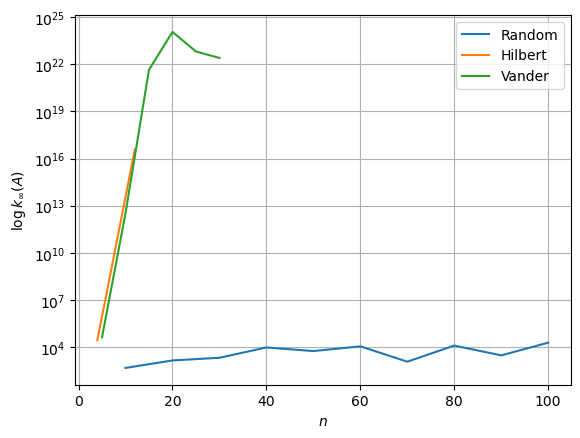

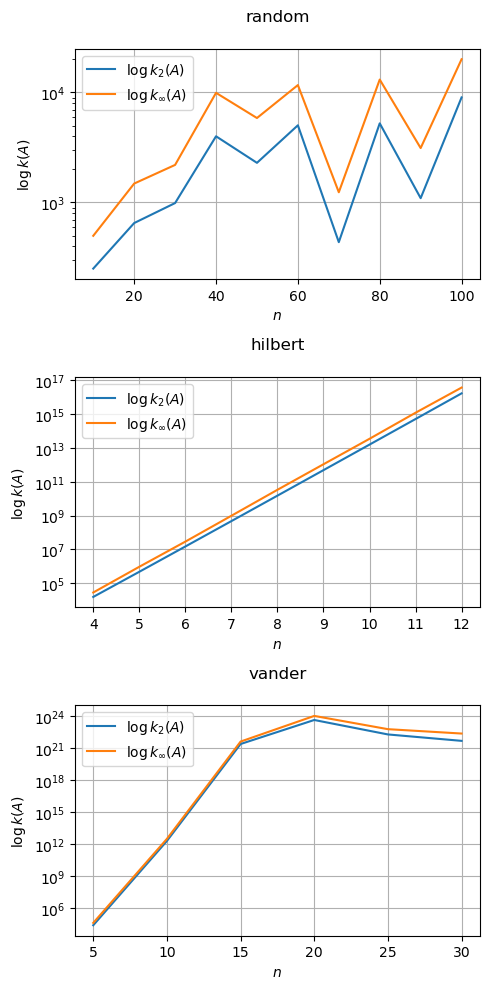

In [11]:
# Make a plot with log scaling on the y-axis
for condition in conditions:
    plt.semilogy(l_random_N, condition['random'])
    plt.semilogy(l_hilb_N, condition['hilbert'])
    plt.semilogy(l_vand_N, condition['vander'])
    plt.grid()
    plt.xlabel(r"$n$")
    if condition == conditions_2:
        plt.ylabel(r"$\log k_2(A)$")
    else:
        plt.ylabel(r"$\log k_{\infty}(A)$")
    plt.legend(["Random", "Hilbert", "Vander"])
    plt.show()


plt.figure(figsize=(5, 10))
j = 0
for i in matrix_dict:
    plt.subplot(3, 1, j+1)
    plt.title(i, pad=20)
    plt.semilogy(N_dict[i], conditions[0][i])
    plt.semilogy(N_dict[i], conditions[1][i])
    plt.grid()
    plt.xlabel(r"$n$")
    plt.ylabel(r"$\log k(A)$")
    plt.legend([r"$\log k_2(A)$",r"$\log k_{\infty}(A)$"])
    j += 1
plt.tight_layout()
plt.show()

This is not a coincidence. Indeed, the condition number of basically every matrix grows with the dimensionality ! As a consequence, the threshold defining an ill-conditioned matrix should depend on n

# Floating point arithmetic

### Punto 1

Halving a number (dividing by 2.0) in base-2 corresponds to reducing the exponent by 1, which is the most efficient way to find the smallest distinguishable increment  
Using 2.0 ensures that the method is both efficient and aligned with the binary structure of floating-point arithmetic, allowing the calculation to converge exactly at the machine epsilon.  
the mantissa has 53 bits, including one implicit bit for normalization (so only 52 bits are explicitly stored)

In [12]:
epsilon = 1.0
mantissa = 0

while 1.0 + epsilon > 1.0:
    mantissa += 1
    epsilon /= 2.0

epsilon *= 2.0

print(f"The machine epsilon is: {epsilon} and the mantissa t is: {mantissa}")

The machine epsilon is: 2.220446049250313e-16 and the mantissa t is: 53


### Punto 2

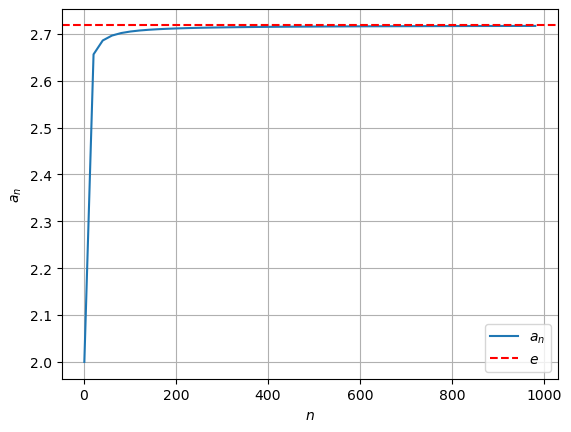

In [13]:
n = np.arange(1, 1_001, 20)

a = (1+(1/n))**n

plt.plot(n, a)
plt.axhline(y=np.e, color='r', linestyle='--')
plt.grid()
plt.xlabel(r"$n$")
plt.ylabel(r"$a_{n}$")
plt.legend([r"$a_{n}$",r"$e$"])
plt.show()

### Punto 3

In [14]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

print("Rank of A:", np.linalg.matrix_rank(A), " A is full rank dim di A :", A.shape[0])
print("Rank of B:", np.linalg.matrix_rank(B), " B is NOT full rank dim di B :", B.shape[0])
print("Determinant of A:", np.linalg.det(A))
print("Determinant of B:", np.linalg.det(B))
print("Eigenvalues of A:", np.linalg.eigvals(A))
print("Eigenvalues of B:", np.linalg.eigvals(B))


Rank of A: 2  A is full rank dim di A : 2
Rank of B: 1  B is NOT full rank dim di B : 2
Determinant of A: 10.000000000000002
Determinant of B: 0.0
Eigenvalues of A: [5. 2.]
Eigenvalues of B: [5. 0.]


In [15]:
c =np.array([[0,-1],[1,0]]) 
print(np.linalg.eigvals(c))

[0.+1.j 0.-1.j]


In a full rank the determinant is non-zero, so all eigenvalues are non-zero if they exist in R.  
This beacause of the linear indipendence between the colums and rows of the matrix, that creates a basis of a vector space, so for each existing eigenvector, it is expand or reduce of a factor(>0) equal to the eigenvalue along his span.  
While in the other hand, since B is not full rank matrix, it implies that the matrix is a trasformation that reduces the dimension, so we have that the determinant is zero and also at least one of the eigenvalue, due to the eigen vector that is reduce of dimension (it has to be not null and has to be part of the ker(A)).

# CODICE FORSE UTILE

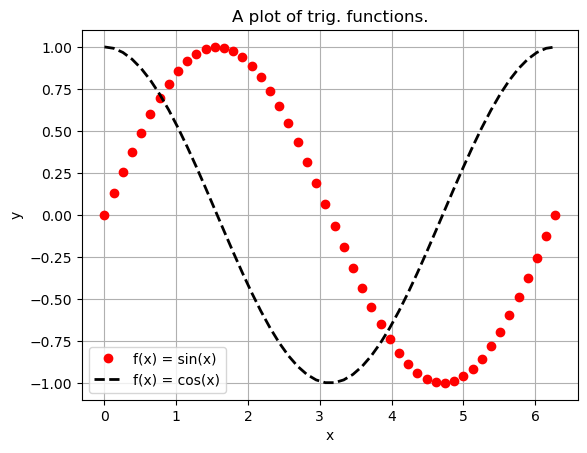

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Creating two vectors
a = 0
b = 2*np.pi
N = 50

x = np.linspace(a, b, N)
y1 = np.sin(x)
y2 = np.cos(x)


# Visualize
plt.plot(x, y1, 'o', color='red')
plt.plot(x, y2, '--', color='k', linewidth=2)
plt.title('A plot of trig. functions.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['f(x) = sin(x)', 'f(x) = cos(x)'])
plt.grid()
plt.show()

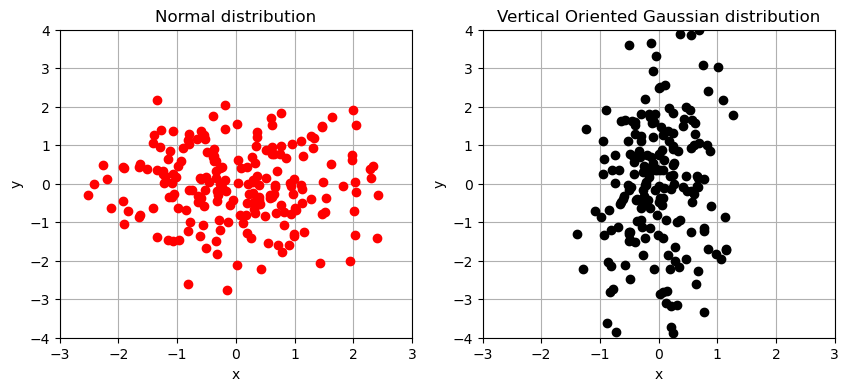

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Creating data
N = 200

x1 = np.random.normal(0, 1, (N, ))
y1 = np.random.normal(0, 1, (N, ))

x2 = np.random.normal(0, 0.5, (N, ))
y2 = np.random.normal(0, 2, (N, ))


# Visualize
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'o', color='red')
plt.title('Normal distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'o', color='k')
plt.title('Vertical Oriented Gaussian distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.grid()

plt.show()

In [18]:
import os

print(os.getcwd())

# Define a path (possibly relative to the current Working Directory)
path = "./data"

# Print the files in the given path
print(os.listdir(path))

/home/pp26/ml/homework_ssm


FileNotFoundError: [Errno 2] No such file or directory: './data'

In [ ]:
import time
import random

# Initialize a random array of length 100_000
l = [random.gauss() for _ in range(100_000)]

# Start timer
start_time = time.time()

# Cycle on l and project to 0 all the negative elements
for i in range(len(l)):
    if l[i] < 0:
        l[i] = 0

# End timer
end_time = time.time()

# Print execution time
print(end_time - start_time)